## roc_auc_score

1. AUC：AUC（Area Under ROC Curve），即 ROC 曲线下面积。
2. AUC意义：若学习器A的ROC曲线被学习器B的ROC曲线包围，则学习器B的性能优于学习器A的性能；若学习器A的ROC曲线和学习器B的ROC曲线交叉，则比较二者ROC曲线下的面积大小，即比较AUC的大小，AUC值越大，性能越好。
3. sklearn 中计算 AUC 值的方法

```py
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test,y_pred)
```

说明：

- `y_pred` 即可以是类别，也可以是概率。
- `roc_auc_score` 直接根据真实值和预测值计算 auc 值，省略计算 roc 的过程。

In [3]:
help(roc_auc_score)

Help on function roc_auc_score in module sklearn.metrics.ranking:

roc_auc_score(y_true, y_score, average='macro', sample_weight=None)
    Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    from prediction scores.
    
    Note: this implementation is restricted to the binary classification task
    or multilabel classification task in label indicator format.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples] or [n_samples, n_classes]
        True binary labels in binary label indicators.
    
    y_score : array, shape = [n_samples] or [n_samples, n_classes]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    average : string, [None, 'micro', 'macro' (default), 'samples', 'weighted']
        If ``None``, the 

In [1]:
# -*- coding: utf-8 -*-
"""
# 作者：wanglei5205
# 邮箱：wanglei5205@126.com
# 博客：http://cnblogs.com/wanglei5205
# github：http://github.com/wanglei5205
"""

### 真实值和预测值
import numpy as np
y_test = np.array([0,0,1,1])
y_pred1 = np.array([0.3,0.2,0.25,0.7])
y_pred2 = np.array([0,0,1,0])

### 性能度量auc
from sklearn.metrics import roc_auc_score

# 预测值是概率
auc_score1 = roc_auc_score(y_test,y_pred1)
print(auc_score1)

# 预测值是类别
auc_score2 = roc_auc_score(y_test,y_pred2)
print(auc_score2)

0.75
0.75


In [6]:
from sklearn.metrics.pairwise import pairwise_distances

In [7]:
D = np.array([np.linalg.norm(r1-r2) for r1 in X] for r2 in X)
D

NameError: name 'X' is not defined

Populating the interactive namespace from numpy and matplotlib
Accuracy (train) for L1 logistic: 82.7% 
Accuracy (train) for L2 logistic (Multinomial): 82.7% 
Accuracy (train) for L2 logistic (OvR): 80.0% 
Accuracy (train) for Linear SVC: 82.0% 
Accuracy (train) for GPC: 82.7% 


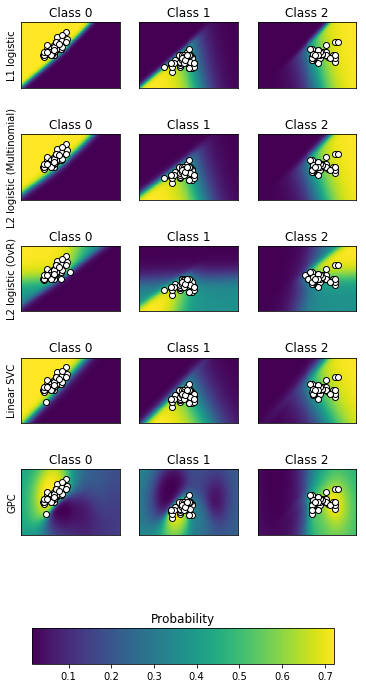

In [9]:
%pylab inline

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                      random_state=0),
    'GPC': GaussianProcessClassifier(kernel)
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()